In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [3]:
df=pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
ph_m=df.mean()
ph_m


ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

In [8]:
df.fillna(inplace=True,value=ph_m)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [11]:
scaler=StandardScaler()
df.iloc[:,:-1]=scaler.fit_transform(df.iloc[:,:-1])
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298,0
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218,0
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365,0
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412,0
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.641587e+00,-0.081758,2.916188,0.028027,7.242640e-01,1.240155,-0.118075,0.018481,0.601124,1
3272,4.953704e-01,-0.085667,-0.534295,0.593290,3.145987e-15,-0.417706,1.698560,0.000000,-1.497627,1
3273,1.591254e+00,-0.626829,1.270810,0.144017,3.145987e-15,0.072263,-0.981329,0.218748,-0.856007,1
3274,-1.329516e+00,1.041355,-1.144058,-0.517373,3.145987e-15,-0.288597,-0.942064,0.703468,0.950797,1


In [12]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3276.000000
mean,-4.684897e-16,1.024821e-15,-4.012528e-17,5.205441e-16,1.587660e-15,1.708035e-16,2.385827e-17,1.691768e-16,5.487403e-16,0.390110
std,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,0.487849
min,-4.817747e+00,-4.530454e+00,-2.474344e+00,-4.277288e+00,-5.666636e+00,-3.028290e+00,-3.653635e+00,-4.164160e+00,-3.225560e+00,0.000000
25%,-5.464412e-01,-5.937372e-01,-7.239916e-01,-6.285247e-01,-4.616071e-01,-7.482911e-01,-6.709187e-01,-6.182751e-01,-6.755095e-01,0.000000
50%,-6.043133e-16,1.819424e-02,-1.238999e-01,5.068209e-03,3.145987e-15,-5.345935e-02,-2.014487e-02,0.000000e+00,-1.507005e-02,0.000000
75%,5.370064e-01,6.174333e-01,6.066532e-01,6.271058e-01,4.596379e-01,6.878605e-01,6.870970e-01,6.513609e-01,6.837866e-01,1.000000
max,4.707802e+00,3.855680e+00,4.472689e+00,3.793631e+00,4.074895e+00,4.048144e+00,4.237147e+00,3.653325e+00,3.552921e+00,1.000000


In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
k = 58
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.96      0.78       412
           1       0.68      0.13      0.22       244

    accuracy                           0.65       656
   macro avg       0.67      0.55      0.50       656
weighted avg       0.66      0.65      0.57       656

Accuracy: 0.6539634146341463


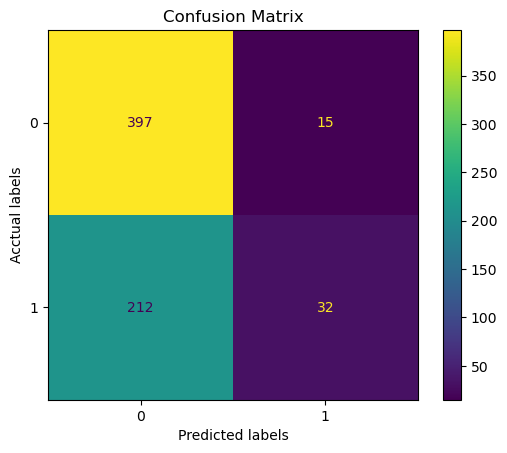

In [15]:
confusion_m=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=confusion_m)
display.plot()
plt.xlabel('Predicted labels')
plt.ylabel('Acctual labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
confusion_m

array([[397,  15],
       [212,  32]])